<a href="https://colab.research.google.com/github/praveen-221/Age-Gender-Emotion-prediction-using-Audio/blob/main/ML_project_Age.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Age Classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
#data = pd.read_csv("/content/drive/MyDrive/cleaned-dataset/cleaned_age.csv")
data = pd.read_csv("/content/drive/MyDrive/cleaned_age.csv")
# data = pd.read_csv("cleaned_age.csv", index_col = None)

In [ ]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'meanfreq', 'sd', 'median', 'Q25', 'Q75',
       'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun',
       'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx',
       'label'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
data.label = le.fit_transform(data.label)
data

,Unnamed: 0.1,Unnamed: 0,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,66,67,0.133338,0.069304,0.107668,0.089192,0.195267,0.106075,3.043456,13.694173,...,0.133338,0.121968,0.047337,0.277457,0.822656,0.0000,4.687500,4.687500,0.076296,2
1,84,85,0.137433,0.058518,0.112037,0.092841,0.200079,0.107238,2.807995,12.776650,...,0.137433,0.111204,0.047151,0.277457,1.313384,0.0000,6.046875,6.046875,0.135811,2
2,85,86,0.142227,0.065447,0.112242,0.093455,0.202909,0.109455,2.380899,9.942833,...,0.142227,0.118711,0.047013,0.275862,0.593750,0.0000,6.539062,6.539062,0.096102,0
3,87,88,0.133325,0.072849,0.113360,0.082861,0.203753,0.120892,1.904123,7.799218,...,0.133325,0.116200,0.047105,0.279070,0.424922,0.0000,5.812500,5.812500,0.081880,2
4,88,89,0.130487,0.070407,0.113418,0.076098,0.196188,0.120089,1.820873,8.561101,...,0.130487,0.114802,0.047151,0.279070,0.198070,0.0000,1.078125,1.078125,0.131579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,6220,6221,0.241377,0.039956,0.252299,0.225070,0.269297,0.044227,2.730197,11.467950,...,0.241377,0.176361,0.047666,0.279070,1.224946,0.0000,6.140625,6.140625,0.093181,1
4357,6222,6223,0.235059,0.053056,0.252532,0.231392,0.264468,0.033077,2.869390,12.009156,...,0.235059,0.120552,0.047572,0.274286,1.103427,0.0000,10.382812,10.382812,0.056716,0
4358,6224,6225,0.230992,0.053711,0.252760,0.223666,0.265731,0.042065,3.277391,15.202833,...,0.230992,0.162745,0.047059,0.277457,1.297944,0.1875,11.812500,11.625000,0.081470,2
4359,6230,6231,0.240334,0.044747,0.253897,0.233837,0.265619,0.031782,2.826720,11.350446,...,0.240334,0.134127,0.046967,0.271186,0.528390,0.0000,3.187500,3.187500,0.065266,1


In [ ]:
X = data.drop("label", axis="columns")
X

,Unnamed: 0.1,Unnamed: 0,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,...,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
0,66,67,0.133338,0.069304,0.107668,0.089192,0.195267,0.106075,3.043456,13.694173,...,0.086962,0.133338,0.121968,0.047337,0.277457,0.822656,0.0000,4.687500,4.687500,0.076296
1,84,85,0.137433,0.058518,0.112037,0.092841,0.200079,0.107238,2.807995,12.776650,...,0.101332,0.137433,0.111204,0.047151,0.277457,1.313384,0.0000,6.046875,6.046875,0.135811
2,85,86,0.142227,0.065447,0.112242,0.093455,0.202909,0.109455,2.380899,9.942833,...,0.106545,0.142227,0.118711,0.047013,0.275862,0.593750,0.0000,6.539062,6.539062,0.096102
3,87,88,0.133325,0.072849,0.113360,0.082861,0.203753,0.120892,1.904123,7.799218,...,0.108583,0.133325,0.116200,0.047105,0.279070,0.424922,0.0000,5.812500,5.812500,0.081880
4,88,89,0.130487,0.070407,0.113418,0.076098,0.196188,0.120089,1.820873,8.561101,...,0.101534,0.130487,0.114802,0.047151,0.279070,0.198070,0.0000,1.078125,1.078125,0.131579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4356,6220,6221,0.241377,0.039956,0.252299,0.225070,0.269297,0.044227,2.730197,11.467950,...,0.270242,0.241377,0.176361,0.047666,0.279070,1.224946,0.0000,6.140625,6.140625,0.093181
4357,6222,6223,0.235059,0.053056,0.252532,0.231392,0.264468,0.033077,2.869390,12.009156,...,0.254402,0.235059,0.120552,0.047572,0.274286,1.103427,0.0000,10.382812,10.382812,0.056716
4358,6224,6225,0.230992,0.053711,0.252760,0.223666,0.265731,0.042065,3.277391,15.202833,...,0.267214,0.230992,0.162745,0.047059,0.277457,1.297944,0.1875,11.812500,11.625000,0.081470
4359,6230,6231,0.240334,0.044747,0.253897,0.233837,0.265619,0.031782,2.826720,11.350446,...,0.264169,0.240334,0.134127,0.046967,0.271186,0.528390,0.0000,3.187500,3.187500,0.065266


In [ ]:
y = data.label
y

0       2
1       2
2       0
3       2
4       0
       ..
4356    1
4357    0
4358    2
4359    1
4360    2
Name: label, Length: 4361, dtype: int64

In [ ]:
import seaborn as sns

In [ ]:
#Feature Selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest


bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_) #ChiSquare value of each feature with respect to y
#Higher the chisquare value, more is its contribution/ more valuable is the feature for predicting y
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(15,'Score')) #Choosing the 15 most valuable features

           Specs        Score
0   Unnamed: 0.1  5812.729146
1     Unnamed: 0  5810.897652
9           kurt    19.461315
20       dfrange     6.338463
19        maxdom     6.185824
17       meandom     3.275138
8           skew     2.073884
18        mindom     0.816030
7            IQR     0.446062
11           sfm     0.410737
12          mode     0.364293
5            Q25     0.274910
21       modindx     0.125296
3             sd     0.081467
2       meanfreq     0.039252


In [ ]:
l = featureScores.nlargest(15,'Score')['Specs']
print(l)
x_new = X[l]

0     Unnamed: 0.1
1       Unnamed: 0
9             kurt
20         dfrange
19          maxdom
17         meandom
8             skew
18          mindom
7              IQR
11             sfm
12            mode
5              Q25
21         modindx
3               sd
2         meanfreq
Name: Specs, dtype: object


In [ ]:
x_new.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'kurt', 'dfrange', 'maxdom', 'meandom',
       'skew', 'mindom', 'IQR', 'sfm', 'mode', 'Q25', 'modindx', 'sd',
       'meanfreq'],
      dtype='object')

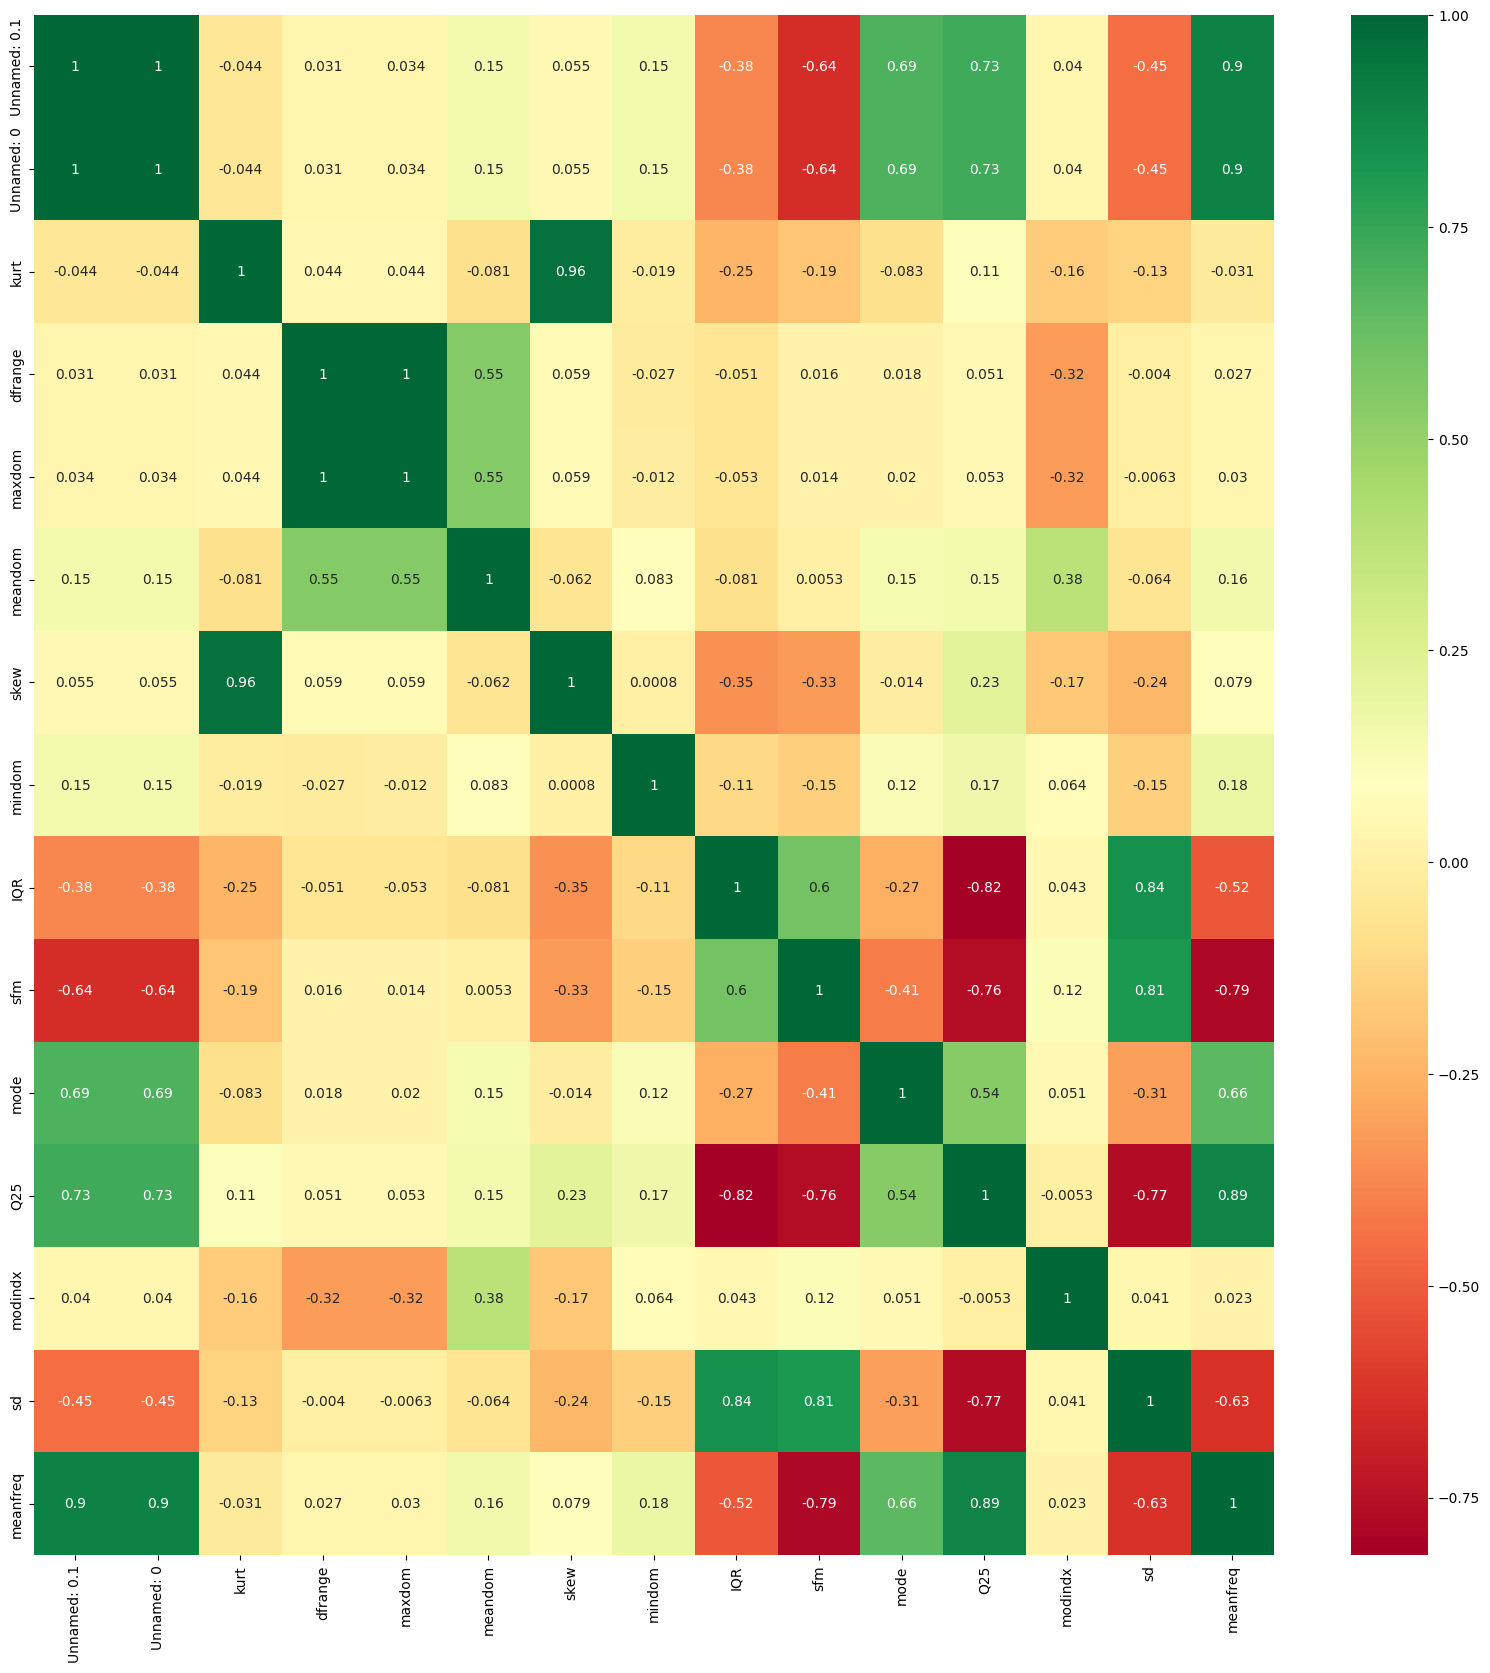

In [ ]:
corrmat = x_new.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(x_new[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In above heatmap we can see that 'Unnamed: 0.1' and  'Unnamed: 0' has correlation value of 1 and same for 'dfrange' and 'maxdom'. So we drop columns 'Unnamed:0' and 'maxdom'

In [ ]:
x_new = x_new[['Unnamed: 0.1', 'kurt', 'dfrange', 'meandom',
       'skew', 'mindom', 'IQR', 'sfm', 'mode', 'Q25', 'modindx', 'sd',
       'meanfreq']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2)
print(len(X_train), len(X_test))

3488 873


**Decision Tree:**

In [ ]:
TreeModel = tree.DecisionTreeClassifier()
TreeModel.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
print(TreeModel.score(X_train, y_train))
print(TreeModel.score(X_test, y_test))

1.0
0.5028636884306987


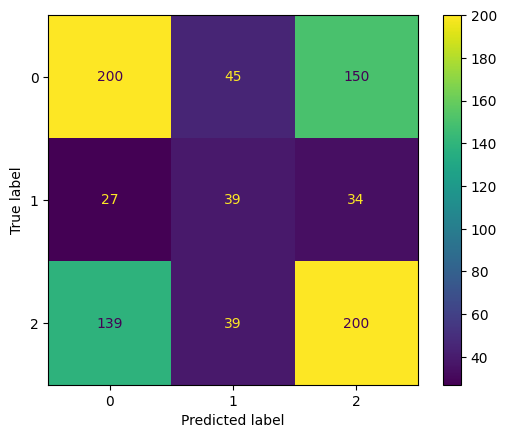

In [ ]:
y_pred = TreeModel.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"precision: {round(precision_score(y_test, y_pred, average='micro'),3)}")
print(f"recall: {round(recall_score(y_test, y_pred, average='micro'),3)}")
print(f"f1: {round(accuracy_score(y_test, y_pred), 3)}")

Accuracy: 0.503
precision: 0.503
recall: 0.503
f1: 0.503


**Random Forest Classification:**

In [ ]:
RFModel = RandomForestClassifier()
RFModel.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = RFModel.predict(X_test)

In [ ]:
print(RFModel.score(X_train, y_train))
print(RFModel.score(X_test, y_test))

1.0
0.581901489117984


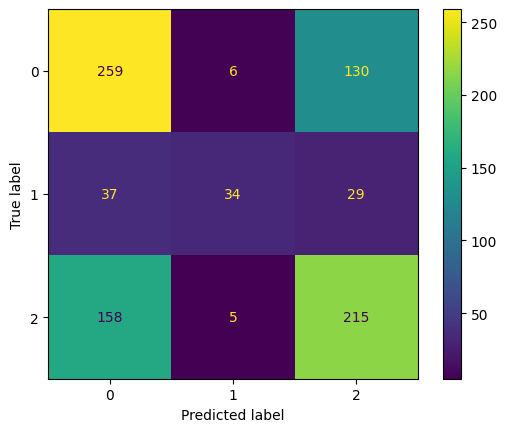

In [ ]:
y_pred = RFModel.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"precision: {round(precision_score(y_test, y_pred, average='micro'),3)}")
print(f"recall: {round(recall_score(y_test, y_pred, average='micro'),3)}")
print(f"f1: {round(accuracy_score(y_test, y_pred), 3)}")

Accuracy: 0.582
precision: 0.582
recall: 0.582
f1: 0.582


**SVM:**

In [ ]:
SVMClassifier = SVC(gamma=0.001, C=0.5)
SVMClassifier.fit(X_train, y_train)

SVC(C=0.5, gamma=0.001)

In [ ]:
print(SVMClassifier.score(X_train, y_train))
print(SVMClassifier.score(X_test, y_test))

0.5298165137614679
0.44558991981672397


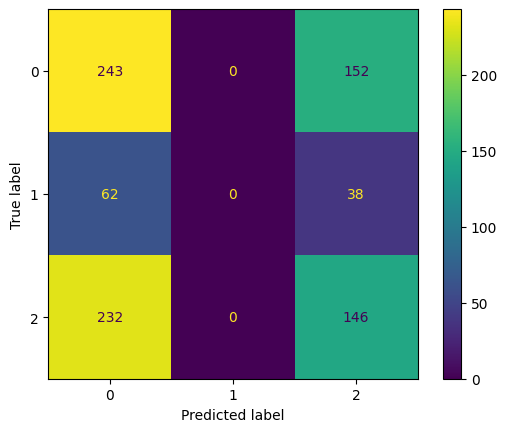

In [ ]:
y_pred = SVMClassifier.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"precision: {round(precision_score(y_test, y_pred, average='micro'),3)}")
print(f"recall: {round(recall_score(y_test, y_pred, average='micro'),3)}")
print(f"f1: {round(accuracy_score(y_test, y_pred), 3)}")

Accuracy: 0.446
precision: 0.446
recall: 0.446
f1: 0.446


KNN:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.5837155963302753
0.44215349369988544


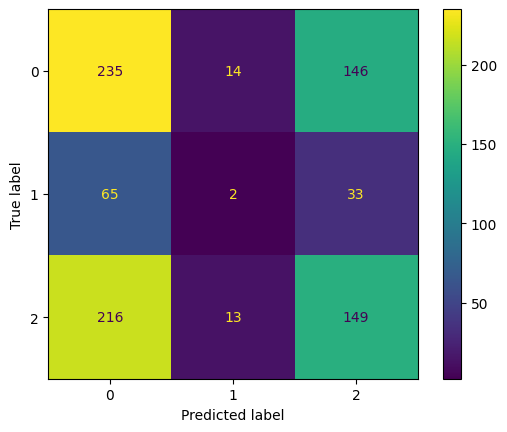

In [ ]:
y_pred = knn.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"precision: {round(precision_score(y_test, y_pred, average='weighted'),3)}")
print(f"recall: {round(recall_score(y_test, y_pred, average='weighted'),3)}")
print(f"f1: {round(accuracy_score(y_test, y_pred), 3)}")

Accuracy: 0.442
precision: 0.411
recall: 0.442
f1: 0.442


XGB:

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
print(xgb.score(X_train, y_train))
print(xgb.score(X_test, y_test))

0.9985665137614679
0.5693012600229095


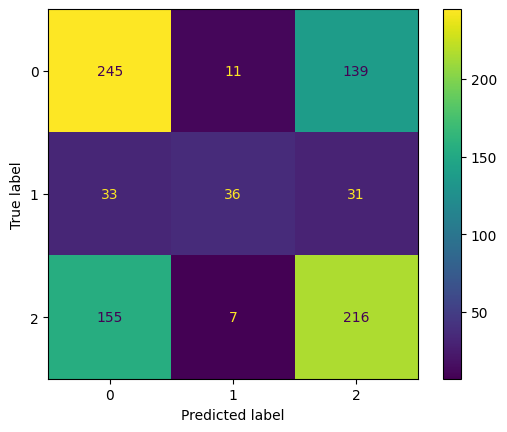

In [ ]:
y_pred = xgb.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"precision: {round(precision_score(y_test, y_pred, average='weighted'),3)}")
print(f"recall: {round(recall_score(y_test, y_pred, average='weighted'),3)}")
print(f"f1: {round(accuracy_score(y_test, y_pred), 3)}")

Accuracy: 0.569
precision: 0.575
recall: 0.569
f1: 0.569


ANN:

In [ ]:
import tensorflow as tf
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
ann.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
109/109 [==============================] - 2s 3ms/step - loss: 33.5046 - accuracy: 0.1325
Epoch 2/100
109/109 [==============================] - 0s 3ms/step - loss: 23.7492 - accuracy: 0.1325
Epoch 3/100
109/109 [==============================] - 0s 3ms/step - loss: 15.7437 - accuracy: 0.1325
Epoch 4/100
109/109 [==============================] - 0s 3ms/step - loss: 8.1725 - accuracy: 0.1325
Epoch 5/100
109/109 [==============================] - 0s 3ms/step - loss: 1.2291 - accuracy: 0.1439
Epoch 6/100
109/109 [==============================] - 0s 3ms/step - loss: 0.5318 - accuracy: 0.1468
Epoch 7/100
109/109 [==============================] - 0s 3ms/step - loss: 0.5929 - accuracy: 0.1445
Epoch 8/100
109/109 [==============================] - 0s 3ms/step - loss: 0.4031 - accuracy: 0.1373
Epoch 9/100
109/109 [==============================] - 0s 2ms/step - loss: 0.4006 - accuracy: 0.1342
Epoch 10/100
109/109 [==============================] - 0s 2ms/step - loss: 0.4706 - acc

In [ ]:
print(ann.evaluate(X_train, y_train))
print(ann.evaluate(X_test, y_test))

109/109 [==============================] - 1s 3ms/step - loss: 0.2215 - accuracy: 0.1562
[0.22154369950294495, 0.15625]
28/28 [==============================] - 0s 3ms/step - loss: 0.2305 - accuracy: 0.1489
[0.23051799833774567, 0.14891180396080017]


In [ ]:
# validation_generator = test_datagen.flow_from_directory(test_data_path,
#                                                         target_size=(img_rows, img_cols),
#                                                         batch_size=batch_size,
#                                                         class_mode='categorical')


28/28 [==============================] - 0s 2ms/step


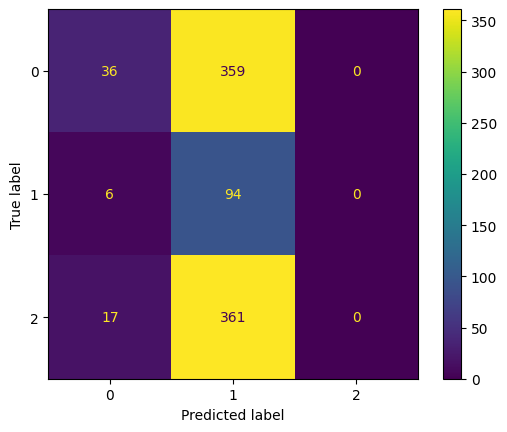

In [ ]:
y_pred = ann.predict(X_test)
y_pred = np.where(y_pred > 0.5, 1, 0)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"precision: {round(precision_score(y_test, y_pred, average='weighted'),3)}")
print(f"recall: {round(recall_score(y_test, y_pred, average='weighted'),3)}")
print(f"f1: {round(accuracy_score(y_test, y_pred), 3)}")

Accuracy: 0.149
precision: 0.289
recall: 0.149
f1: 0.149


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes:

In [ ]:
from sklearn.naive_bayes  import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
print(nb.score(X_train, y_train))
print(nb.score(X_test, y_test))

0.47448394495412843
0.47995418098510884


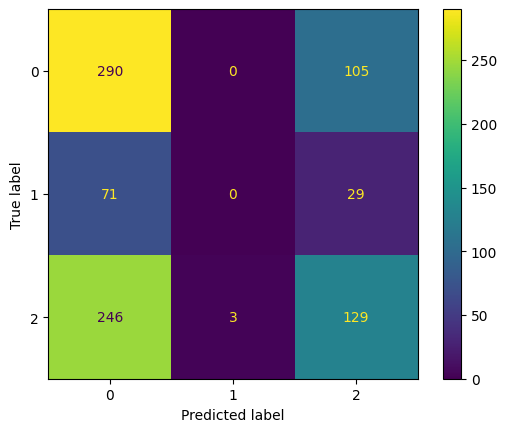

In [ ]:
y_pred = nb.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"precision: {round(precision_score(y_test, y_pred, average='weighted'),3)}")
print(f"recall: {round(recall_score(y_test, y_pred, average='weighted'),3)}")
print(f"f1: {round(accuracy_score(y_test, y_pred), 3)}")

Accuracy: 0.48
precision: 0.429
recall: 0.48
f1: 0.48


CatBoost:

In [ ]:
!pip install catboost
from catboost  import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.7 MB/s eta 0:00:00


In [ ]:
cb=CatBoostClassifier()
cb.fit(X_train,y_train)

Learning rate set to 0.084332
0:	learn: 1.0783536	total: 58.9ms	remaining: 58.8s
1:	learn: 1.0621971	total: 68.5ms	remaining: 34.2s
2:	learn: 1.0470588	total: 77.4ms	remaining: 25.7s
3:	learn: 1.0339428	total: 86.3ms	remaining: 21.5s
4:	learn: 1.0234406	total: 95.6ms	remaining: 19s
5:	learn: 1.0130355	total: 104ms	remaining: 17.3s
6:	learn: 1.0018963	total: 114ms	remaining: 16.2s
7:	learn: 0.9917840	total: 123ms	remaining: 15.2s
8:	learn: 0.9830702	total: 132ms	remaining: 14.5s
9:	learn: 0.9740847	total: 141ms	remaining: 13.9s
10:	learn: 0.9664054	total: 149ms	remaining: 13.4s
11:	learn: 0.9613922	total: 158ms	remaining: 13s
12:	learn: 0.9558867	total: 182ms	remaining: 13.8s
13:	learn: 0.9510422	total: 194ms	remaining: 13.7s
14:	learn: 0.9454648	total: 213ms	remaining: 14s
15:	learn: 0.9410130	total: 229ms	remaining: 14.1s
16:	learn: 0.9363144	total: 248ms	remaining: 14.3s
17:	learn: 0.9320017	total: 259ms	remaining: 14.1s
18:	learn: 0.9282357	total: 278ms	remaining: 14.4s
19:	learn: 0

In [ ]:
print(cb.score(X_train, y_train))
print(cb.score(X_test, y_test))

0.9739105504587156
0.5830469644902635


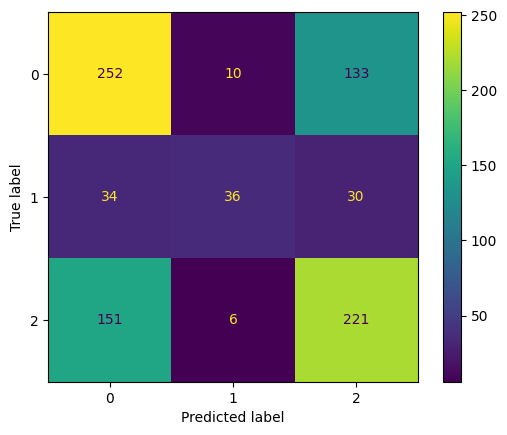

In [ ]:
y_pred = cb.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"precision: {round(precision_score(y_test, y_pred, average='weighted'),3)}")
print(f"recall: {round(recall_score(y_test, y_pred, average='weighted'),3)}")
print(f"f1: {round(accuracy_score(y_test, y_pred), 3)}")

Accuracy: 0.583
precision: 0.589
recall: 0.583
f1: 0.583


Gradient Boosting

In [ ]:
from sklearn.ensemble  import GradientBoostingClassifier
from sklearn.metrics import classification_report
gb=GradientBoostingClassifier(learning_rate=0.1)
gb.fit(X_train,y_train)
print(classification_report(y_test,gb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.55      0.66      0.60       395
           1       0.67      0.28      0.39       100
           2       0.57      0.55      0.56       378

    accuracy                           0.57       873
   macro avg       0.60      0.50      0.52       873
weighted avg       0.58      0.57      0.56       873



In [ ]:
print(nb.score(X_train, y_train))
print(nb.score(X_test, y_test))

0.47448394495412843
0.47995418098510884


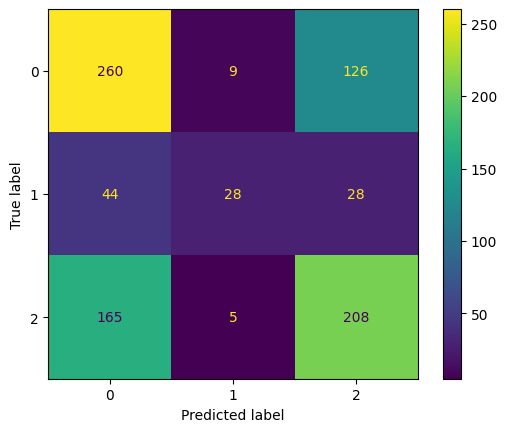

In [ ]:
y_pred = gb.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()


In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"precision: {round(precision_score(y_test, y_pred, average='weighted'),3)}")
print(f"recall: {round(recall_score(y_test, y_pred, average='weighted'),3)}")
print(f"f1: {round(accuracy_score(y_test, y_pred), 3)}")

Accuracy: 0.568
precision: 0.576
recall: 0.568
f1: 0.568


ADA Boost:

In [ ]:
from sklearn.ensemble  import AdaBoostClassifier
ab=AdaBoostClassifier()
ab.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
print(ab.score(X_train, y_train))
print(ab.score(X_test, y_test))

0.5475917431192661
0.4936998854524628


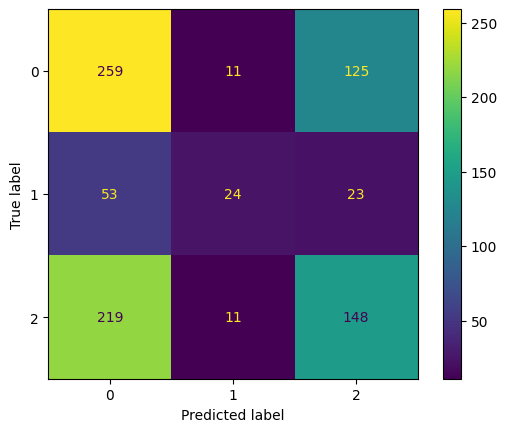

In [ ]:
y_pred = ab.predict(X_test)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm)
cm2.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score

print(f"Accuracy: {round(accuracy_score(y_test, y_pred),3)}")
print(f"precision: {round(precision_score(y_test, y_pred, average='weighted'),3)}")
print(f"recall: {round(recall_score(y_test, y_pred, average='weighted'),3)}")
print(f"f1: {round(accuracy_score(y_test, y_pred), 3)}")

Accuracy: 0.494
precision: 0.497
recall: 0.494
f1: 0.494


CNN

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
import numpy as np
X2=np.array(X_train)
X3=np.array(X_test)
X_train2=X2.reshape(X_train.shape[0],X_train.shape[1],1)
X_test2=X3.reshape(X_test.shape[0],X_test.shape[1],1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Embedding,Dense,Flatten,MaxPooling1D,Conv1D,BatchNormalization,Dropout
# import model
model20=Sequential()
# layers
model20.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=X_train2[0].shape)) #creates a convolutional layer which extracts features from the input
model20.add(BatchNormalization()) #normalizes each feature for better accuracy and faster training
model20.add(Dropout(0.2)) # hides 20% neurons to avoid overfitting

model20.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model20.add(BatchNormalization())
model20.add(Dropout(0.5))

model20.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model20.add(BatchNormalization())
model20.add(Dropout(0.5))

model20.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model20.add(BatchNormalization())
model20.add(Dropout(0.25))

model20.add(Flatten()) #convert input into 1D
model20.add(Dense(64, activation='relu')) #fully connected layer for classification
model20.add(Dropout(0.25))

model20.add(Dense(100, activation='relu'))
model20.add(Dense(50, activation='relu'))
model20.add(Dense(25, activation='relu'))
model20.add(Dense(1, activation = "sigmoid"))

In [ ]:
model20.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history=model20.fit(X_train2,y_train,epochs=80,validation_data=(X_test2,y_test))

Epoch 1/80
109/109 [==============================] - 5s 14ms/step - loss: 0.2531 - accuracy: 0.1482 - val_loss: 0.3131 - val_accuracy: 0.1145
Epoch 2/80
109/109 [==============================] - 1s 12ms/step - loss: 0.1569 - accuracy: 0.1325 - val_loss: 0.2930 - val_accuracy: 0.1145
Epoch 3/80
109/109 [==============================] - 1s 12ms/step - loss: 0.1253 - accuracy: 0.1325 - val_loss: 0.3221 - val_accuracy: 0.1145
Epoch 4/80
109/109 [==============================] - 1s 11ms/step - loss: 0.2525 - accuracy: 0.1325 - val_loss: 0.1150 - val_accuracy: 0.1145
Epoch 5/80
109/109 [==============================] - 1s 14ms/step - loss: 0.1384 - accuracy: 0.1325 - val_loss: -0.0312 - val_accuracy: 0.1145
Epoch 6/80
109/109 [==============================] - 2s 19ms/step - loss: -0.3433 - accuracy: 0.1325 - val_loss: -1.5652 - val_accuracy: 0.1145
Epoch 7/80
109/109 [==============================] - 2s 16ms/step - loss: 36.0497 - accuracy: 0.1325 - val_loss: -1.9336 - val_accuracy: 0

In [ ]:
def plot_learningcurve(history,epochs):
  epoch=range(1,epochs+1)
  # accuracy
  plt.plot(epoch, history.history['accuracy'])
  plt.plot(epoch, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['train','val'], loc='upper left')
  plt.show()

  # loss
  plt.plot(epoch, history.history['loss'])
  plt.plot(epoch, history.history['val_loss'])
  plt.title('Model loss')
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.legend(['train','val'], loc='upper left')
  plt.show()

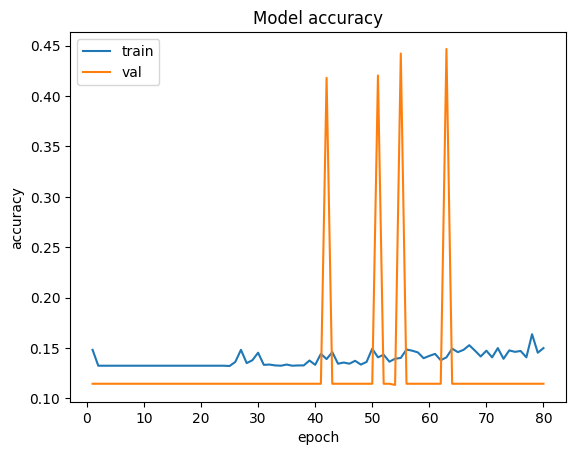

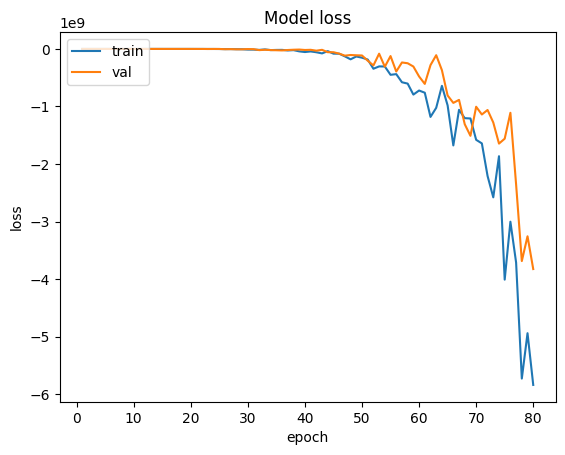

In [ ]:
plot_learningcurve(history,80)

In [ ]:

c=model20.evaluate(X_test2,y_test)

28/28 [==============================] - 0s 7ms/step - loss: -3824658176.0000 - accuracy: 0.1145


In [ ]:
pred = (model20.predict(X_test2))
res = []
for ele in pred:
  if(ele < 0.5):
    res.append(0)
  else:
    res.append(1)
print(classification_report(y_test, res))

28/28 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       395
           1       0.11      1.00      0.21       100
           2       0.00      0.00      0.00       378

    accuracy                           0.11       873
   macro avg       0.04      0.33      0.07       873
weighted avg       0.01      0.11      0.02       873

